## Packages, Constants
- Different packages, Libraries

- Different constants and parameters

In [1]:
from packages.common_packages import *

## File paths

The file path point to the `Train`, `Test` and `Augmented` Datasets with each having 6 classes and stored in 6 folders corresponding to each speech command: 

- `ddyo`- `kkono` - `mu maaso` - `emabega` - `yimirira` - `unknown`


In [2]:
from packages.dataset_path import *

## Directory structure and Label

In [3]:
from packages.utils import print_directory_tree, list_directory_contents

In [4]:
print_directory_tree(train_data_dir)
train_commands = list_directory_contents(train_data_dir, 'Train')

Train/
    emabega/
    unknown/
    mumaaso/
    yimirira/
    ddyo/
    kkono/
Train commands labels: ['emabega' 'unknown' 'mumaaso' 'yimirira' 'ddyo' 'kkono']


In [5]:
print_directory_tree(test_data_dir)
test_commands = list_directory_contents(test_data_dir, 'Test')

Test/
    emabega/
    unknown/
    mumaaso/
    yimirira/
    ddyo/
    kkono/
Test commands labels: ['emabega' 'unknown' 'mumaaso' 'yimirira' 'ddyo' 'kkono']


In [6]:
print_directory_tree(aug_train_data_dir)
aug_train_commands = list_directory_contents(aug_train_data_dir, 'New_Train')

New_Train/
    emabega/
    unknown/
    mumaaso/
    yimirira/
    ddyo/
    kkono/
New_Train commands labels: ['emabega' 'unknown' 'mumaaso' 'yimirira' 'ddyo' 'kkono']


# Load sample audio files

In [7]:
emabega_file_path = os.path.join(train_data_dir, 'emabega', 'emabega_001.wav')
ddyo_file_path = os.path.join(train_data_dir, 'ddyo', 'ddyo_001.wav')
yimirira_file_path = os.path.join(train_data_dir, 'yimirira', 'yimirira_001.wav')
kkono_file_path = os.path.join(train_data_dir, 'kkono', 'kkono_001.wav')
mumasso_file_path = os.path.join(train_data_dir, 'mumaaso', 'mumaaso_001.wav')

file_paths = [emabega_file_path, ddyo_file_path, yimirira_file_path, kkono_file_path, mumasso_file_path]

# Dataset Preparaption

## Train and validation Datasets

In [8]:
# Function to create train and validation audio datasets

from packages.features import create_train_audio_dataset

In [9]:
train_ds, val_ds, label_names = create_train_audio_dataset(train_data_dir)

Found 9985 files belonging to 6 classes.
Using 7988 files for training.
Using 1997 files for validation.
(32, 16000)
(32,)


## Test dataset

In [10]:
# Function to create test audio dataset

from packages.features import create_test_audio_dataset

In [11]:
test_ds = create_test_audio_dataset(test_data_dir)

Found 2608 files belonging to 6 classes.
(32, 16000)
(32,)


# Feature Extraction

In [12]:
from packages.features import preprocess_melspec_audio_datasets

In [13]:
train_mel_spec_ds, val_mel_spec_ds, test_mel_spec_ds = preprocess_melspec_audio_datasets(train_ds, val_ds, test_ds)

## Shape consistency

In [14]:
print(train_mel_spec_ds.element_spec)
print(val_mel_spec_ds.element_spec)
print(test_mel_spec_ds.element_spec)

(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


# Model 1

### Input shape 

In [15]:
example_spectrograms = next(iter(train_mel_spec_ds))[0]
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)

num_labels = len(label_names)
print(f'Labels {label_names}')

Input shape: (124, 128, 1)
Labels ['ddyo' 'emabega' 'kkono' 'mumaaso' 'unknown' 'yimirira']


In [16]:
from packages.model import model

### Model Architecture

In [17]:
model = model(input_shape, num_labels)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,438 (447.02 KB)

 Trainable params: 114,438 (447.02 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the model

In [18]:
from packages.model import compile_and_train_model

In [20]:
history = compile_and_train_model(model, train_mel_spec_ds, val_mel_spec_ds)

Epoch 1/50


250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 256ms/step - accuracy: 0.3319 - loss: 1.6027 - val_accuracy: 0.6585 - val_loss: 0.8872 - learning_rate: 0.0010
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 262ms/step - accuracy: 0.6875 - loss: 0.8605 - val_accuracy: 0.7997 - val_loss: 0.5719 - learning_rate: 0.0010
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - accuracy: 0.7996 - loss: 0.5734 - val_accuracy: 0.8568 - val_loss: 0.4214 - learning_rate: 0.0010
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 200ms/step - accuracy: 0.8455 - loss: 0.4645 - val_accuracy: 0.8783 - val_loss: 0.3711 - learning_rate: 0.0010
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 203ms/step - accuracy: 0.8675 - loss: 0.3881 - val_accuracy: 0.8703 - val_loss: 0.4047 - learning_rate: 0.0010
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 200ms/step - accuracy: 0.8774 - loss: 0.3531 - val_accuracy: 0.8828 - val_loss: 0.3626 - learning_rate: 0.0010
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 205ms/step - accuracy: 0.8987 - loss:

### Plot Accuracy and Loss

In [23]:
from packages.plots import plot_training_history

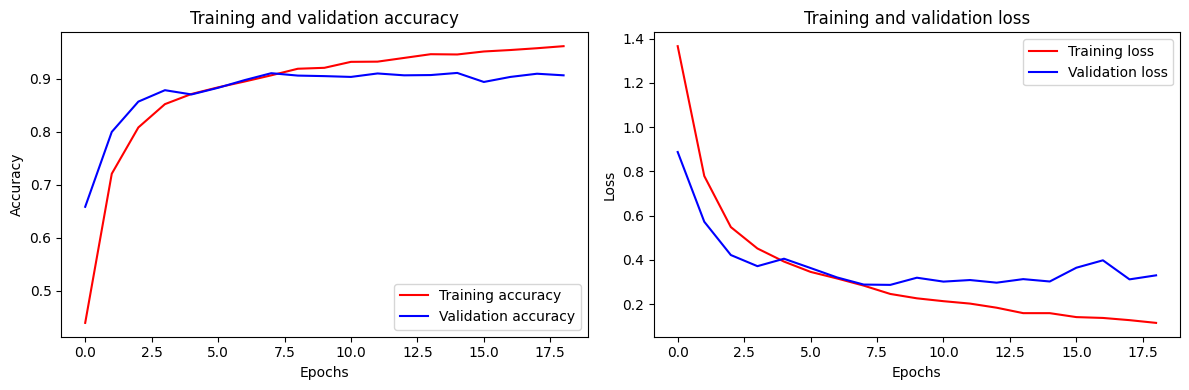

In [24]:
plot_training_history(history)

### Evaluate the model performance

Run the model on the test set and check the model's performance:

In [25]:
from packages.plots import evaluate_model

In [26]:
evaluate_model(model, test_mel_spec_ds)

Test accuracy:      86%
Test loss:          0.38670551776885986
Precision:          0.8709956725061494
Recall:             0.8680981595092024
F1-score:           0.8676568809201218


## Confusion matrix

In [27]:
y_pred = model.predict(test_mel_spec_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_mel_spec_ds.map(lambda s,lab: lab)), axis=0)
label_names_slice = ['ddyo', 'emabega', 'kkono', 'mumaaso', 'unknown', 'yimirira']

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step


In [28]:
from packages.plots import plot_confusion_matrix

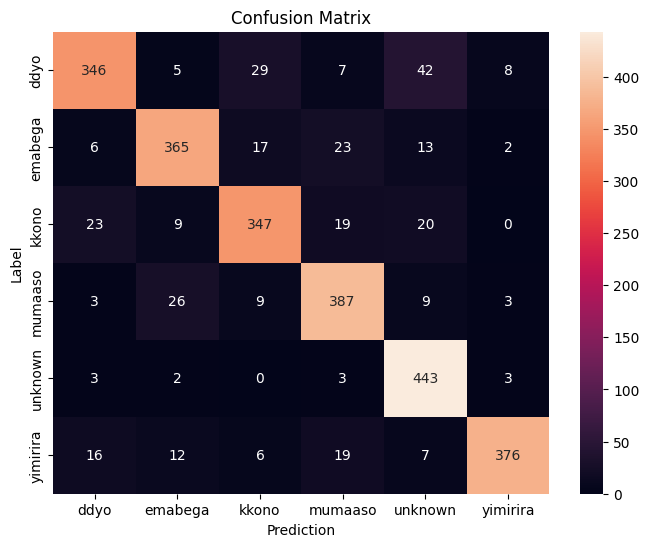

In [29]:
plot_confusion_matrix(y_true, y_pred, label_names_slice)

## save the Keras model

In [ ]:
KERAS_MODEL_PATH = "model/Model_spec_1.keras"

In [36]:
model.save(KERAS_MODEL_PATH)
print('Model has been successfully saved')

Model has been successfully saved


## Size of the keras model

In [ ]:
from packages.utils import get_and_convert_file_size

In [ ]:
keras_model_size = get_and_convert_file_size(KERAS_MODEL_PATH, 'KB')

File size: 1386.042 Kilobytes
